In [4]:
import os
import sys
os.environ['PYTHONPATH'] = '/home/bk639/mytangosproperty'
os.environ['TANGOS_DB_CONNECTION'] = '/home/bk639/data_base/Merians_test.db'
os.environ['TANGOS_SIMULATION_FOLDER'] = '/home/bk639/data/MerianCDM'
os.environ['TANGOS_PROPERTY_MODULES']='mytangosproperty'
#add ~/mytangosproperty to python path


import tangos_merger_plot as tmp

In [2]:
!tangos write ba_s --sim r615.romulus25.3072g1HsbBH --include-only="latest().halo_number()==1" --include-only="t()>12.7" --backwards --with-prerequisites

                          name |     handler     | property class
-------------------------------+-----------------+-------------------------------------------------------------
           BH_central_distance | PynbodyInputHan | tangos.properties.pynbody.BH.BH
             BH_central_offset | PynbodyInputHan | tangos.properties.pynbody.BH.BH
                       BH_mass | PynbodyInputHan | tangos.properties.pynbody.BH.BH
                               | EagleLikeInputH | tangos.properties.pynbody.eagle.EagleBH
                       BH_mass | PynbodyInputHan | tangos.properties.pynbody.BH.BH
                               | EagleLikeInputH | tangos.properties.pynbody.eagle.EagleBH
                       BH_mdot | PynbodyInputHan | tangos.properties.pynbody.BH.BH
                               | EagleLikeInputH | tangos.properties.pynbody.eagle.EagleBH
                       BH_mdot | PynbodyInputHan | tangos.properties.pynbody.BH.BH
                               | EagleLikeInputH | 

In [3]:

#this locks the database, so kill the kernel to unlock
import tangos
#once  tangos is loaded force a reload
import importlib
importlib.reload(tangos)
#importlib.reload(mytangosproperty)
#from merger_properties import SmoothAxisRatio
#print names of SmoothAxisRatio functions

tangos.all_simulations()
print(tangos.all_simulations())
r615 = tangos.get_simulation('r615.romulus25.3072g1HsbBH')
r761 = tangos.get_simulation('r761.romulus25.3072g1HsbBH')
r613 = tangos.get_simulation('r613.romulus25.3072g1HsbBH')
r918 = tangos.get_simulation('r918.romulus25.3072g1HsbBH')
r431 = tangos.get_simulation('r431.romulus25.3072g1HsbBH')

[<Simulation("r1023.romulus25.3072g1HsbBH")>, <Simulation("r431.romulus25.3072g1HsbBH")>, <Simulation("r442.romulus25.3072g1HsbBH")>, <Simulation("r468.romulus25.3072g1HsbBH")>, <Simulation("r488.romulus25.3072g1HsbBH")>, <Simulation("r489.romulus25.3072g1HsbBH")>, <Simulation("r492.romulus25.3072g1HsbBH")>, <Simulation("r502.romulus25.3072g1HsbBH")>, <Simulation("r515.romulus25.3072g1HsbBH")>, <Simulation("r523.romulus25.3072g1HsbBH")>, <Simulation("r544.romulus25.3072g1HsbBH")>, <Simulation("r552.romulus25.3072g1HsbBH")>, <Simulation("r555.romulus25.3072g1HsbBH")>, <Simulation("r556.romulus25.3072g1HsbBH")>, <Simulation("r568.romulus25.3072g1HsbBH")>, <Simulation("r569.romulus25.3072g1HsbBH")>, <Simulation("r571.romulus25.3072g1HsbBH")>, <Simulation("r597.romulus25.3072g1HsbBH")>, <Simulation("r613.romulus25.3072g1HsbBH")>, <Simulation("r614.romulus25.3072g1HsbBH")>, <Simulation("r615.romulus25.3072g1HsbBH")>, <Simulation("r618.romulus25.3072g1HsbBH")>, <Simulation("r634.romulus25.30

In [4]:
#print properties of halo 1 at timestep -1
halo = r615.timesteps[-1].halos[0]
print(halo.keys())

['#ID', 'numSubStruct', 'Mhalo', 'npart', 'Xc', 'Yc', 'Zc', 'VXc', 'VYc', 'VZc', 'Rhalo', 'Rmax', 'r2', 'mbp_offset', 'com_offset', 'Vmax', 'v_esc', 'sigV', 'lambda', 'lambdaE', 'Lx', 'Ly', 'Lz', 'b', 'c', 'Eax', 'Eay', 'Eaz', 'Ebx', 'Eby', 'Ebz', 'Ecx', 'Ecy', 'Ecz', 'ovdens', 'nbins', 'fMhires', 'Ekin', 'Epot', 'SurfP', 'Phi0', 'cNFW', 'n_gas', 'M_gas', 'lambda_gas', 'lambdaE_gas', 'Lx_gas', 'Ly_gas', 'Lz_gas', 'b_gas', 'c_gas', 'Eax_gas', 'Eay_gas', 'Eaz_gas', 'Ebx_gas', 'Eby_gas', 'Ebz_gas', 'Ecx_gas', 'Ecy_gas', 'Ecz_gas', 'Ekin_gas', 'Epot_gas', 'n_star', 'M_star', 'lambda_star', 'lambdaE_star', 'Lx_star', 'Ly_star', 'Lz_star', 'b_star', 'c_star', 'Eax_star', 'Eay_star', 'Eaz_star', 'Ebx_star', 'Eby_star', 'Ebz_star', 'Ecx_star', 'Ecy_star', 'Ecz_star', 'Ekin_star', 'Epot_star', 'n_gas', 'n_star', 'n_dm', 'ptcls_in_common', 'ptcls_in_common', 'childHalo', 'childHalo', 'childHalo', 'childHalo', 'childHalo', 'childHalo', 'childHalo', 'childHalo', 'childHalo', 'childHalo', 'childHal

In [5]:

import tangos_merger_plot as tmp

for i in range(2,5):
    for sim in tangos.all_simulations():
        print(sim)
        #skip <Simulation("r1023.romulus25.3072g1HsbBH")>
        if sim == tangos.get_simulation('r1023.romulus25.3072g1HsbBH'):
            continue
        halo = sim.timesteps[-i].halos[1]
        prog = halo.calculate('earlier(1)')
        #print ratio of Mvir of prog to Mvir of halo
        print( ( 1 - halo['Mhalo']/prog['Mhalo'])**(-1))



ModuleNotFoundError: No module named 'mytangosproperty'

In [9]:
sims = [r615, r761, r613, r918]
merger_halos = [1,1,1,1]
#sims = [r918]
trees = []
main_lines = []
importlib.reload(tmp)

for sim in sims:
    #get simulation name from sim object
    sim_name = str(sim.basename)
    print(sim_name)
    #strip everything excpt for something like r615
    sim_name = sim_name.split('.')[0]

    print(f"Building merger tree for {sim}")
    figure_folder = f'../../Figures/mergers/{sim_name}'
    if not os.path.exists(figure_folder):
        os.makedirs(figure_folder)

    halo = sim.timesteps[-1].halos[merger_halos[sims.index(sim)]]
    tree, main_line = tmp.build_merger_tree(halo, max_depth=4)
    halo = sim.timesteps[-1].halos[merger_halos[sims.index(sim)]]
    tree, main_line = tmp.build_merger_tree(halo, max_depth=4)

    # Check if any node in the main line is a merger
    merger_found = any(node.is_merger for node in main_line)
    #remove last node from main_line
    main_line = main_line[:-1]
    if merger_found:
        #plot_ba_ca_smoothed(main_line, figure_folder, sim_name)
        #plot_ba_ca(main_line, figure_folder, sim_name)
        trees.append(tree)
        main_lines.append(main_line)



r615.romulus25.3072g1HsbBH
Building merger tree for <Simulation("r615.romulus25.3072g1HsbBH")>
1.980894689022175


KeyError: 'rbins_s'

In [7]:
#save 
tmp.save_picklable_data(main_lines)


Loaded existing data from picklable_main_lines.pkl
Saved combined data to picklable_main_lines.pkl


In [3]:
import os
os.environ['TANGOS_DB_CONNECTION'] = '/home/bk639/data_base/BWMDC_test.db'
os.environ['TANGOS_SIMULATION_FOLDER'] = '/home/bk639/data/BWMDC'
import merger_properties
#this locks the database, so kill the kernel to unlock
import tangos
#once  tangos is loaded force a reload
import importlib
importlib.reload(tangos)
importlib.reload(merger_properties)
import tangos_merger_plot as tmp
from merger_properties import SmoothAxisRatio
#print names of SmoothAxisRatio functions

tangos.all_simulations()
elektra = tangos.get_simulation('elektra.cosmo25cmb.4096g5HbwK1BH')

halo = elektra.timesteps[-1].halos[2] #2
print(halo)
print(halo['Mvir'])
print(halo['reff'])

#set earlier timesteps reff to that at -1
# for i in range(2,len(elektra.timesteps)):
#     halo = elektra.timesteps[-i].halos[2]
#     halo['reff'] = elektra.timesteps[-1].halos[2]['reff']
#     print(halo['reff'])
#plt.plot(halo['rbins'], halo.calculate('ba_s_smoothed()'), label='Stellar B/A')


storm = tangos.get_simulation('storm.cosmo25cmb.4096g5HbwK1BH')
halo = storm.timesteps[-4].halos[3]
# for i in range(2,len(storm.timesteps)):
#     halo = storm.timesteps[-i].halos[3]
#     halo['reff'] = storm.timesteps[-1].halos[3]['reff']
#     print(halo['reff'])

#print(halo)
#print(halo['Mvir'])

rogue = tangos.get_simulation('rogue.cosmo25cmb.4096g5HbwK1BH')
halo = rogue.timesteps[-4].halos[0]

# for i in range(2,len(rogue.timesteps)):
#     halo = rogue.timesteps[-i].halos[0]
#     halo['reff'] = rogue.timesteps[-1].halos[0]['reff']
#     print(halo['reff'])
#print(halo)
#print(halo['Mvir'])
# sims = ['h148.cosmo50PLK.3072g3HbwK1BH','h148.cosmo50PLK.3072g3HbwK1BH', 'h329.cosmo50PLK.3072gst5HbwK1BH', 'storm.cosmo25cmb.4096g5HbwK1BH' ,'storm.cosmo25cmb.4096g5HbwK1BH', 'storm.cosmo25cmb.4096g5HbwK1BH', 'cptmarvel.cosmo25cmb.4096g5HbwK1BH']
# merger_halos = [2,11 ,7 ,2,6,7, 7]

ModuleNotFoundError: No module named 'merger_properties'

In [2]:


import numpy as np
sim_names = ['elektra.cosmo25cmb.4096g5HbwK1BH', 'storm.cosmo25cmb.4096g5HbwK1BH', 'rogue.cosmo25cmb.4096g5HbwK1BH']
sims = [tangos.get_simulation(sim) for sim in sim_names]


merger_halos = [2,3,0]
# try:
#     main_lines = pickle.load(open('main_lines.pkl', 'rb'))
#     trees = pickle.load(open('trees.pkl', 'rb'))
# except:
#     print('No existing pickle files found')

main_lines = []
trees = []
NaN = np.nan
merger_ratios = {2: [0.178100,0.102379,None] , 3: [0.226337,0.141545,None], 0: [None,0.019733,None]}


for sim in sims:
    #get simulation name from sim object
    print(sim)
    sim_name = str(sim.basename)
    print(sim_name)
    #strip everything excpt for something like r615
    sim_name = sim_name.split('.')[0]

    print(f"Building merger tree for {sim}")
    figure_folder = f'../../Figures/mergers/{sim_name}'
    if not os.path.exists(figure_folder):
        os.makedirs(figure_folder)

    halo = sim.timesteps[-1].halos[merger_halos[sims.index(sim)]]
    tree, main_line = tmp.build_merger_tree(halo, max_depth=4)

    #compare merger_ratios with values in main_line
    halo_ratios = merger_ratios[merger_halos[sims.index(sim)]]
    for i, node in enumerate(main_line):
        if i == 3:
            break
        if halo_ratios[i] is not None:
            expected_ratio = 1/halo_ratios[i]
        else:
            expected_ratio = None
        #node_merger = node.merger_ratio
        #print(f'Expected: {expected_ratio}, Actual: {node_merger}')
        #update merger ratio
        if halo_ratios[i] is not None:
            main_line[i].merger_ratio = expected_ratio
            main_line[i].is_merger = True
            main_line[i].merger_time = main_line[i].halo.timestep.time_gyr

    main_line = main_line[:-1]
    #print_merger_tree(tree)
    #plot_ba_ca_smoothed(main_line, figure_folder, sim_name)
    #plot_ba_ca(main_line, figure_folder, sim_name)
    
    trees.append(tree)
    main_lines.append(main_line)
    



#save to pickle, try and open existing pickle frist to avoid overwriting


<Simulation("elektra.cosmo25cmb.4096g5HbwK1BH")>
elektra.cosmo25cmb.4096g5HbwK1BH
Building merger tree for <Simulation("elektra.cosmo25cmb.4096g5HbwK1BH")>
1.0999457994294426
1.0999457994294426
1.0999457994294426
1.0999457994294426
1.0999457994294426
1.0999457994294426
<Simulation("storm.cosmo25cmb.4096g5HbwK1BH")>
storm.cosmo25cmb.4096g5HbwK1BH
Building merger tree for <Simulation("storm.cosmo25cmb.4096g5HbwK1BH")>
1.7187970287557166
1.7187970287557166
1.7187970287557166
1.7187970287557166
1.7187970287557166
1.7187970287557166
<Simulation("rogue.cosmo25cmb.4096g5HbwK1BH")>
rogue.cosmo25cmb.4096g5HbwK1BH
Building merger tree for <Simulation("rogue.cosmo25cmb.4096g5HbwK1BH")>
0.8477720928175199
0.8477720928175199
0.8477720928175199
0.8477720928175199
0.8477720928175199
0.8477720928175199


In [2]:
import tangos_merger_plot
# Usage in your main code:
# After generating your main_lines:
tmp.save_picklable_data(main_lines)



NameError: name 'main_lines' is not defined

In [3]:
# When you want to load and use the data later
import tangos_merger_plot
picklable_data = tmp.load_picklable_data()
reconstructed_main_lines = tmp.reconstruct_main_lines(picklable_data)


In [4]:
import numpy as np
for main_line in reconstructed_main_lines:
    for node in main_line:
        print(np.log10(node.mstar), node.merger_ratio,node.halo_number)


7.598859239559366 5.614823133071308 3
7.5907048243102775 9.767628126861954 3
7.575915281656773 None 3
7.777155223753273 4.418190574232229 4
7.776464321903526 7.064891024055954 4
7.772580508145098 None 4
9.21517157626922 None 1
9.206825282830128 50.67653169817058 1
9.18699858460347 None 1


[[<tangos_merger_plot.SimpleHaloNode object at 0x7f3ddd318bf0>, <tangos_merger_plot.SimpleHaloNode object at 0x7f3ddd319be0>, <tangos_merger_plot.SimpleHaloNode object at 0x7f3ddd319d00>], [<tangos_merger_plot.SimpleHaloNode object at 0x7f3ddd31a240>, <tangos_merger_plot.SimpleHaloNode object at 0x7f3ddd319e80>, <tangos_merger_plot.SimpleHaloNode object at 0x7f3ddd319e50>], [<tangos_merger_plot.SimpleHaloNode object at 0x7f3ddd319f70>, <tangos_merger_plot.SimpleHaloNode object at 0x7f3ddd31a000>, <tangos_merger_plot.SimpleHaloNode object at 0x7f3ddd31a1e0>]]
at timestep 13.731118532447283 Gyr, merger ratio is 5.614823133071308
at timestep 13.516741748586895 Gyr, merger ratio is nan
at timestep 13.731118532488576 Gyr, merger ratio is 4.418190574232229
at timestep 13.516741748629212 Gyr, merger ratio is nan
at timestep 13.516741748684929 Gyr, merger ratio is nan
ba_s: 0.58 - 0.62
ca_s: 0.34 - 0.38
ba_d: 0.72 - 0.73
ca_d: 0.46 - 0.49
elektra 3
{'elektra 3': {'ba_s': [array(0.57561346), ar

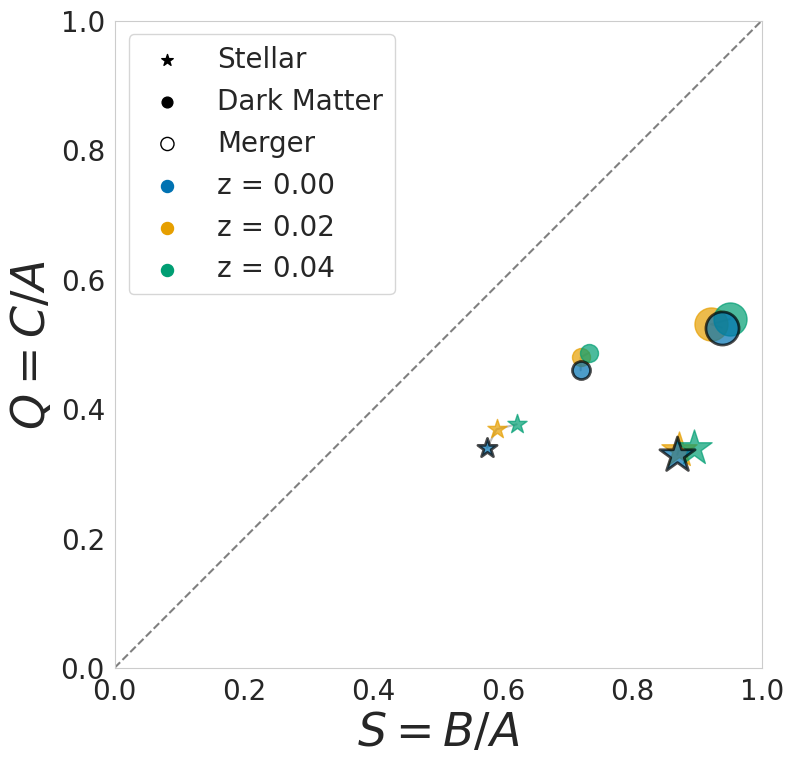

In [11]:

# Usage
#main_lines = load_halo_nodes('main_lines.pkl')
#reload tangos_merger_plot.py
import importlib
importlib.reload(tmp)



print(reconstructed_main_lines)
#remove merger ratios greater than 10
for main_line in reconstructed_main_lines:
    for node in main_line:
        if node.merger_ratio != np.nan and node.merger_ratio != None:
            #print(node.merger_ratio)
            #print(node.merger_time)
            
            print(f'at timestep {node.merger_time} Gyr, merger ratio is {node.merger_ratio}')
            if node.merger_ratio > 6:
                node.merger_ratio = np.nan
                node.is_merger = False

tmp.plot_merger_ba_ca(reconstructed_main_lines, '/home/bk639/OverLeaf/ShapePaper/figures/', link_dm_to_stellar=False, link_timesteps=True)

# tmp.plot_merger_ba_ca(reconstructed_main_lines, '/home/bk639/OverLeaf/ShapePaper/figures/', link_dm_to_stellar=True, link_timesteps=False)

#tmp.plot_Mstar_vs_T(reconstructed_main_lines, '/home/bk639/OverLeaf/ShapePaper/figures/', link_timesteps=True)

No merger found for simulation 2


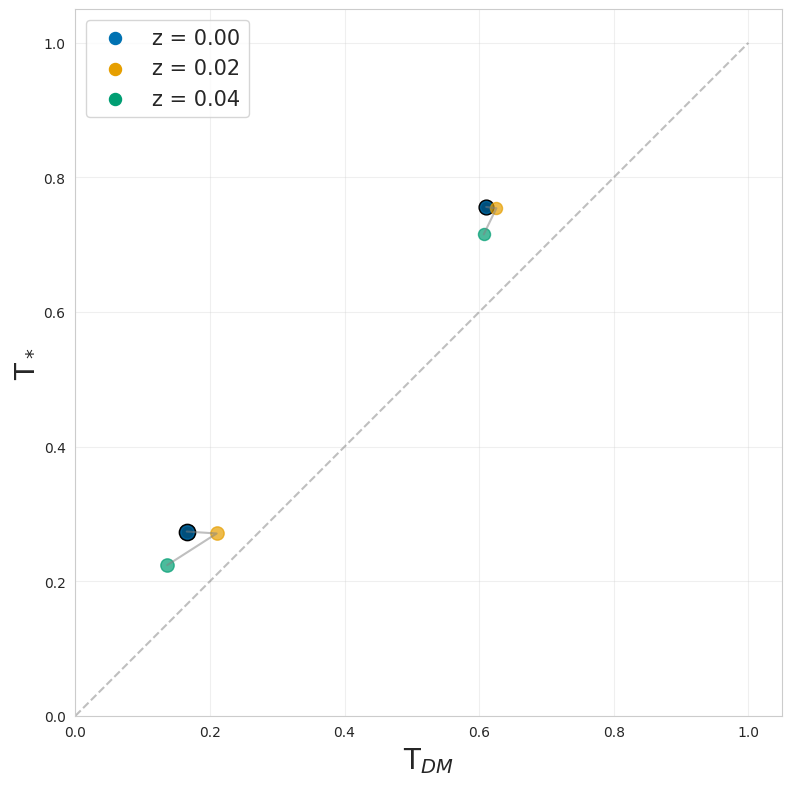

In [7]:
import importlib
importlib.reload(tmp)

tmp.plot_merger_T_d_vs_T_s(reconstructed_main_lines, '/home/bk639/OverLeaf/ShapePaper/figures/', link_timesteps=True)

In [9]:
#print merger ratios with halo numbers and simulation names
for main_line in reconstructed_main_lines:
    for node in main_line:
        print(np.log10(node.mstar), node.merger_ratio,node.halo_number, node.sim_name)

AttributeError: 'SimpleHaloNode' object has no attribute 'sim_name'

In [14]:
merger_ratios = {2: [0.178100,0.102379,None] , 3: [0.226337,0.141545,None], 0: [None,0.019733,None]}

In [26]:
for i in merger_ratios.keys():
    print(merger_ratios[i][:])
    for j in range(3):
        if merger_ratios[i][j] is not None:
            print(1/merger_ratios[i][j])

[0.1781, 0.102379, None]
5.614823133071308
9.767628126861954
[0.226337, 0.141545, None]
4.418190574232229
7.064891024055954
[None, 0.019733, None]
50.67653169817058
